### Import Libreries

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor , RandomForestRegressor
from sklearn.metrics import r2_score , mean_absolute_error
from warnings import filterwarnings
filterwarnings('ignore')
import pickle


### Data Collection

In [3]:
# Load Datasets
train_data = pd.read_csv('Train.csv')

In [4]:
# Check the first rows
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Check the shape of dataset
print('Number of rows:' , train_data.shape[0])
print('Number of columns:' , train_data.shape[1])

Number of rows: 8523
Number of columns: 12


In [7]:
# Check the information of data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
# Check the missing data
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Numerical Features:**
- Item_Weight
- Item_Visibility
- Item_MRP 
- Outlet_Establishment_Year
- Item_Outlet_Sales

**Categorical Features:**
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

### Handling Missing Values

**Missing value Features:**
- Item_Weight
- Outlet_Size

> #### Item_Weight null values

In [14]:
# Mean of Item_Weight
train_data['Item_Weight'].mean()

12.857645184135976

In [16]:
# Handling Item_Weight null values
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean() , inplace= True)

In [17]:
# Check the missing handling
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

> #### Outlet_Size null values

In [18]:
# Check the values
train_data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [24]:
#Calculate mode of Outlet_Size column for each Outlet_Type 
mapping_data = train_data.pivot_table(values='Outlet_Size' , columns= 'Outlet_Type' , aggfunc=(lambda x: x.mode()[0]))

In [29]:
# List of missing values
missing_values= train_data['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [30]:
# Apply the mapping into missing data
train_data.loc[missing_values,'Outlet_Size'] = train_data.loc[missing_values ,'Outlet_Type'  ].apply( lambda x: mapping_data[x])

In [31]:
# Check the missing handling
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Data Anlysis and Visualisation

In [32]:
# Numercial features description
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [45]:
# Numerical Features
numerical_features = train_data.select_dtypes(include=[np.number]).columns.drop('Outlet_Establishment_Year').tolist()

# Categorical Features
categorical_features = train_data.select_dtypes(exclude=[np.number]).columns.tolist()

In [126]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=2)

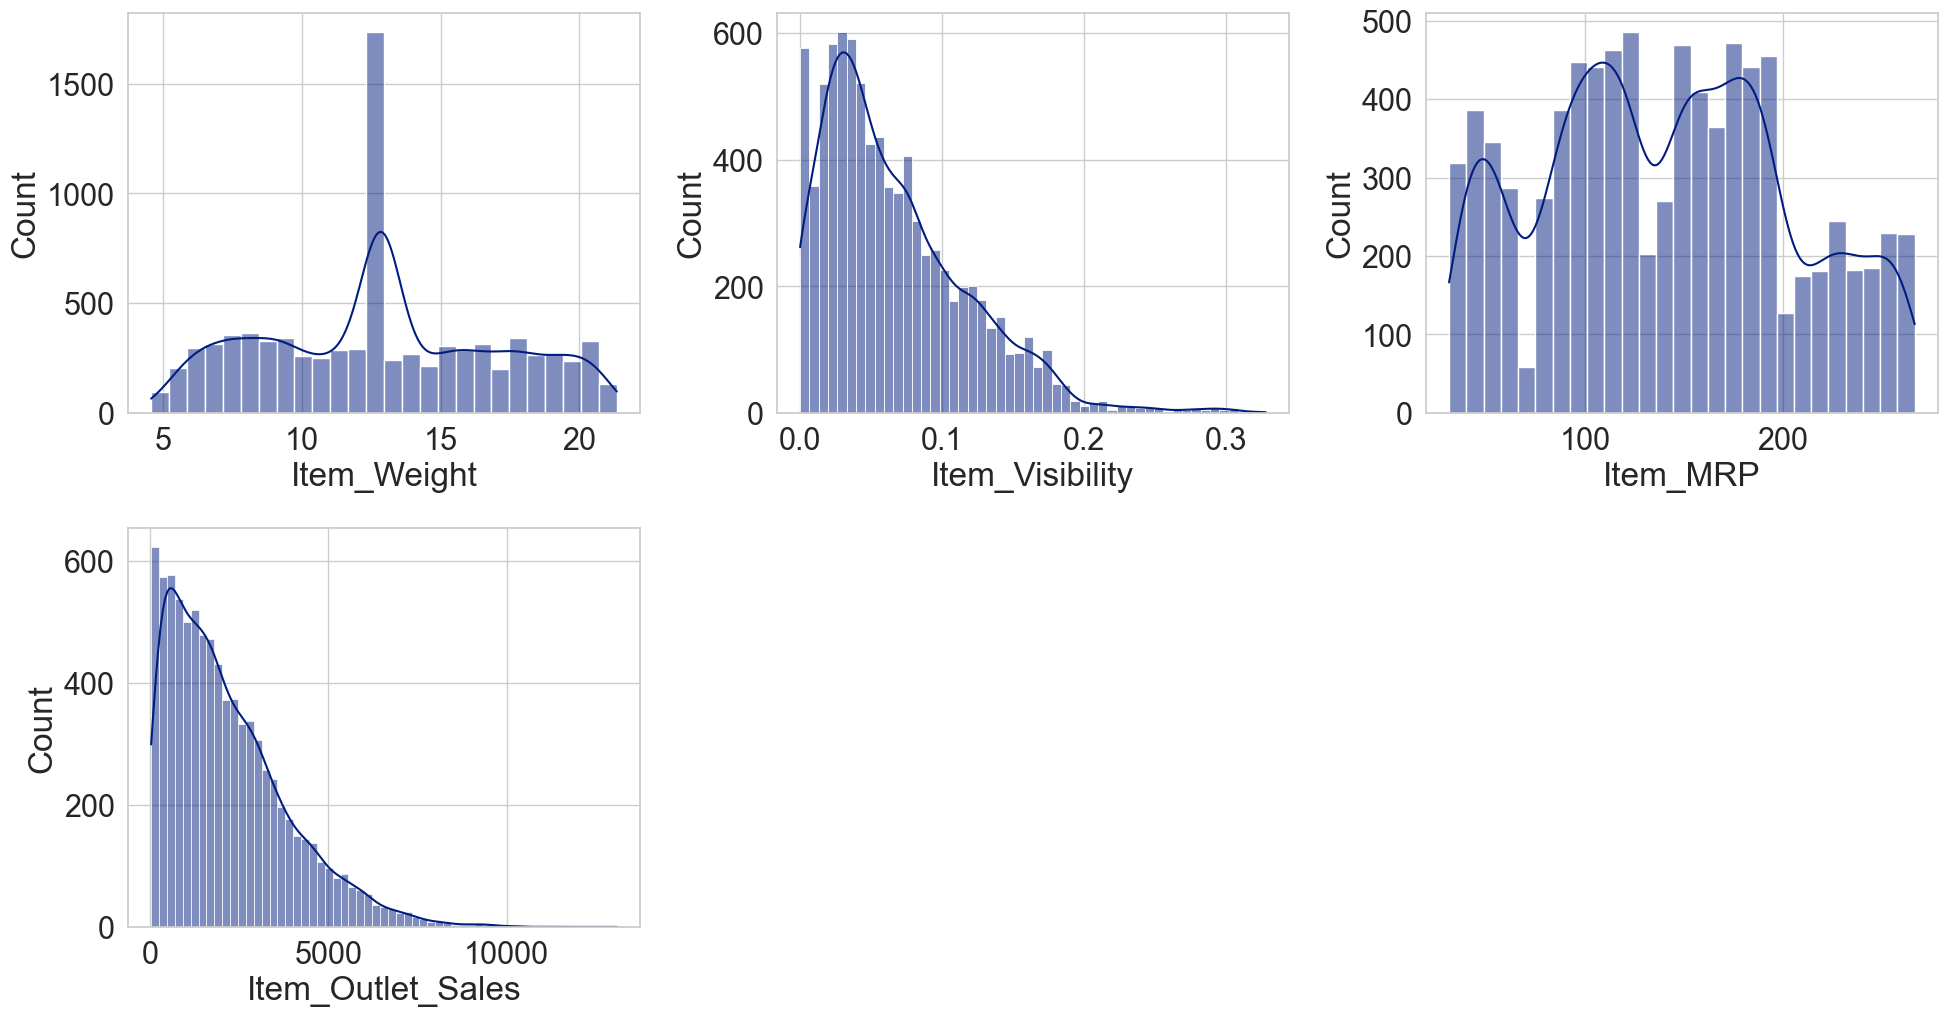

In [127]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(train_data[col], kde=True)
plt.tight_layout()
plt.show()

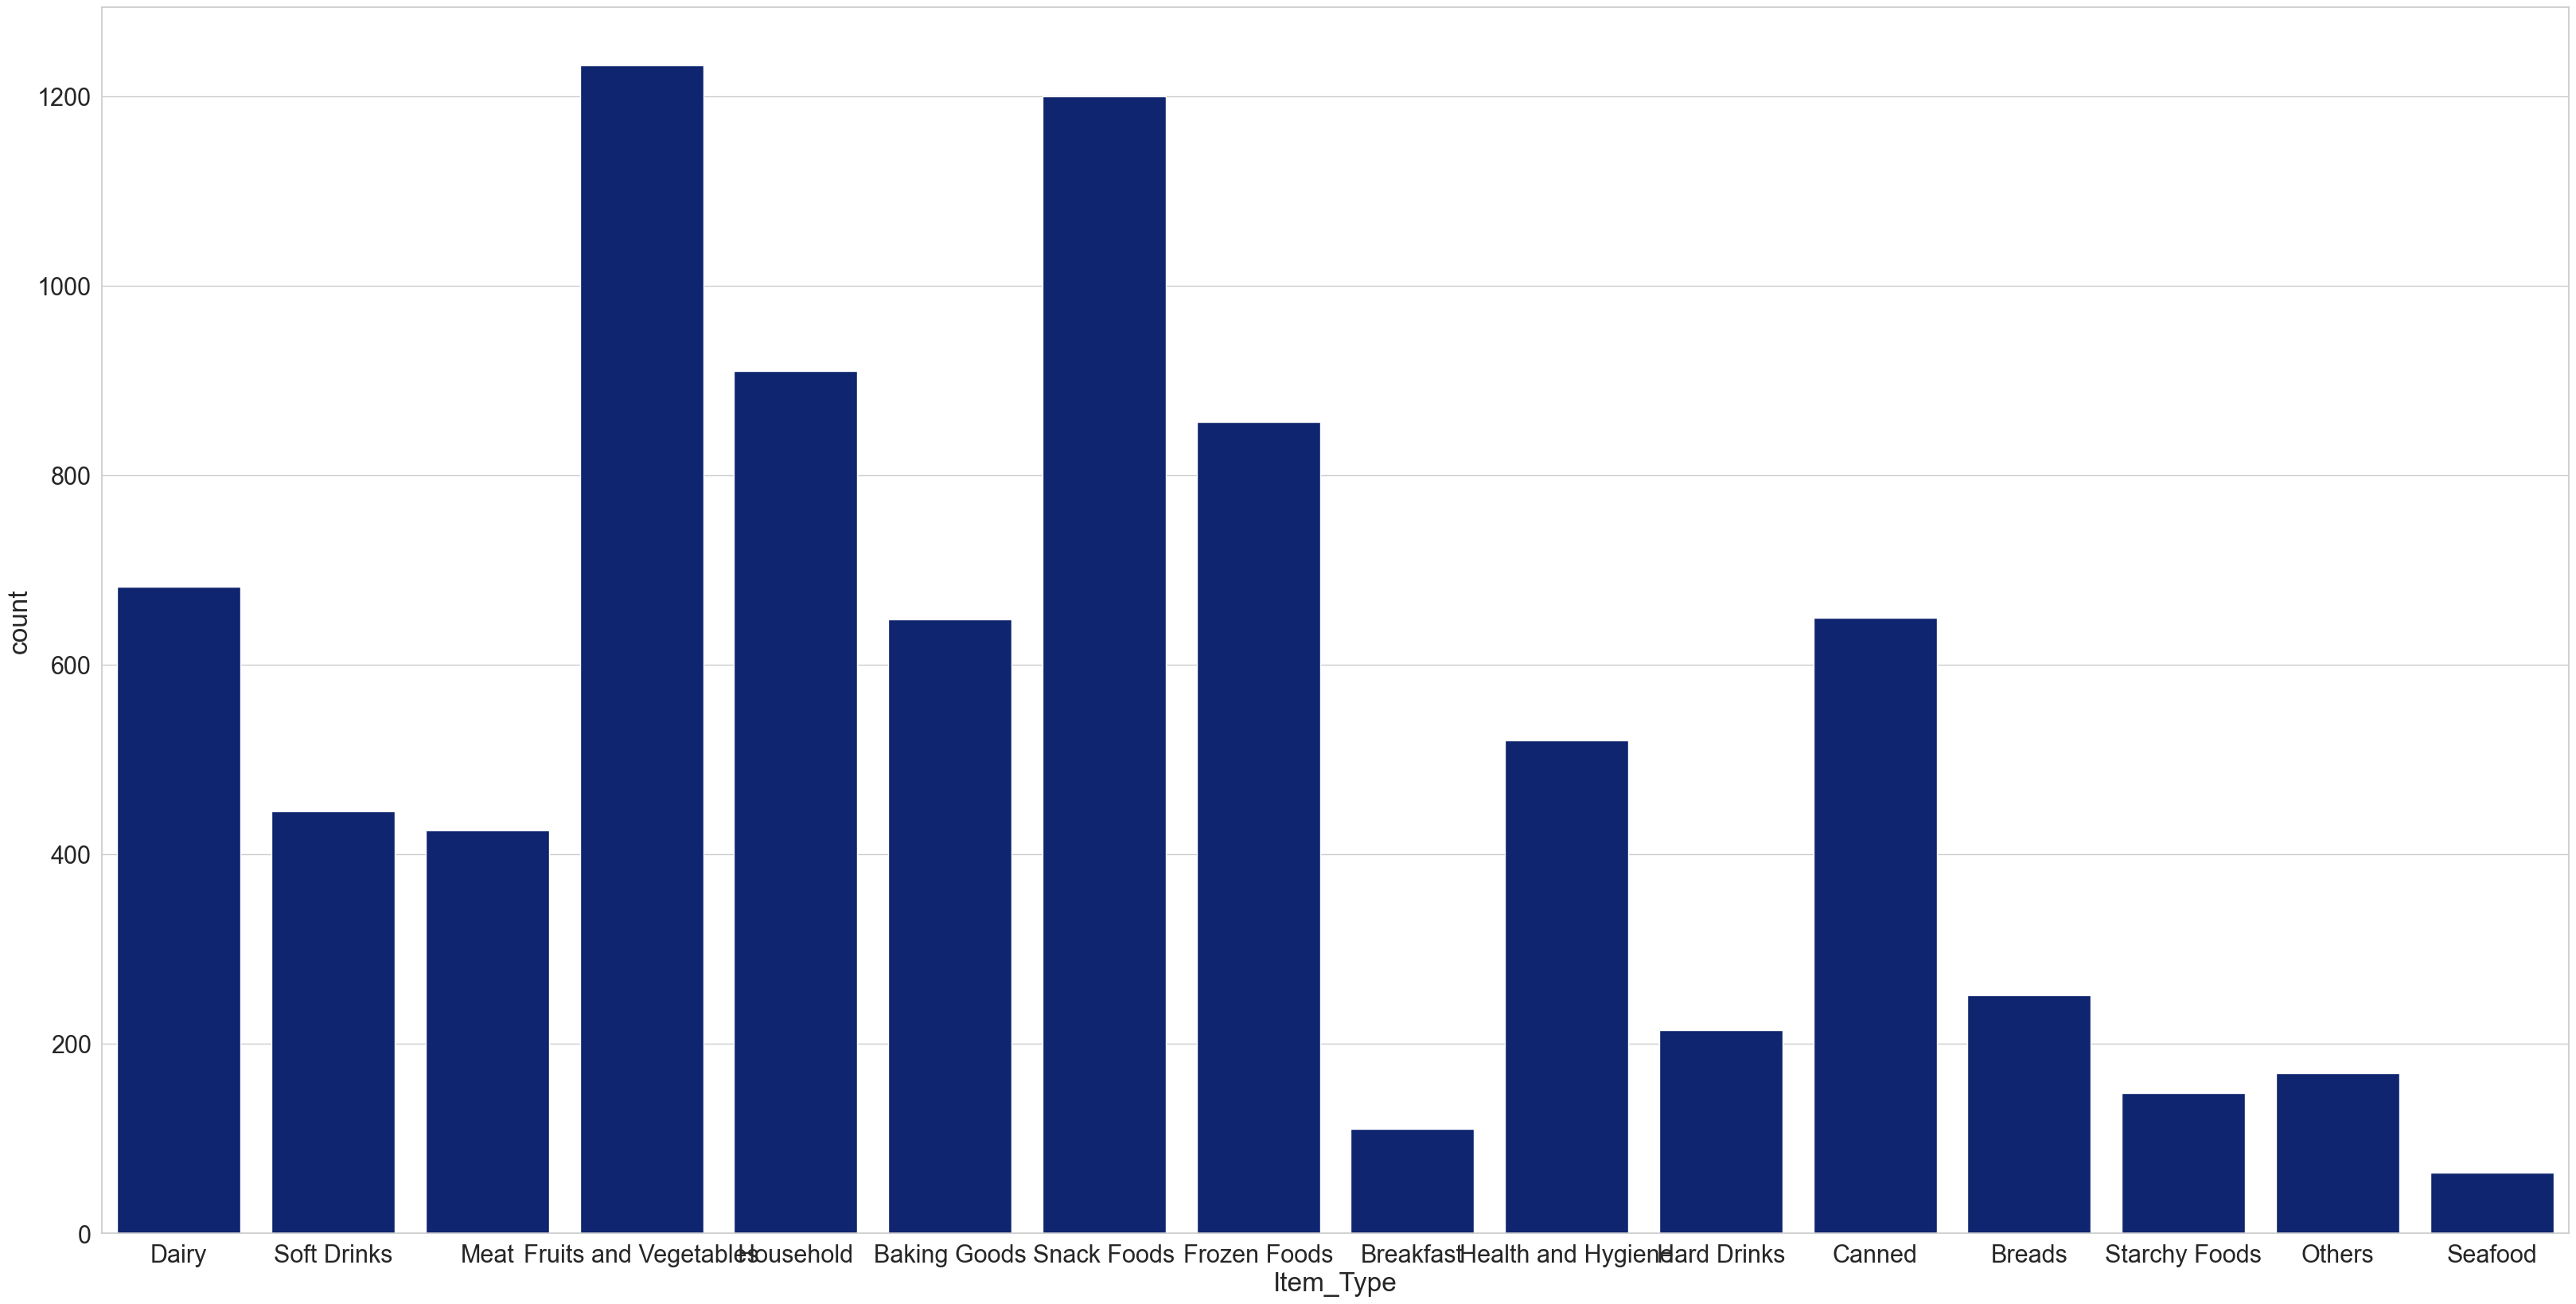

In [128]:
# Countplot for Item_Type feature
plt.figure(figsize=(40,20))
sns.countplot(x= "Item_Type" , data=train_data)
plt.show()

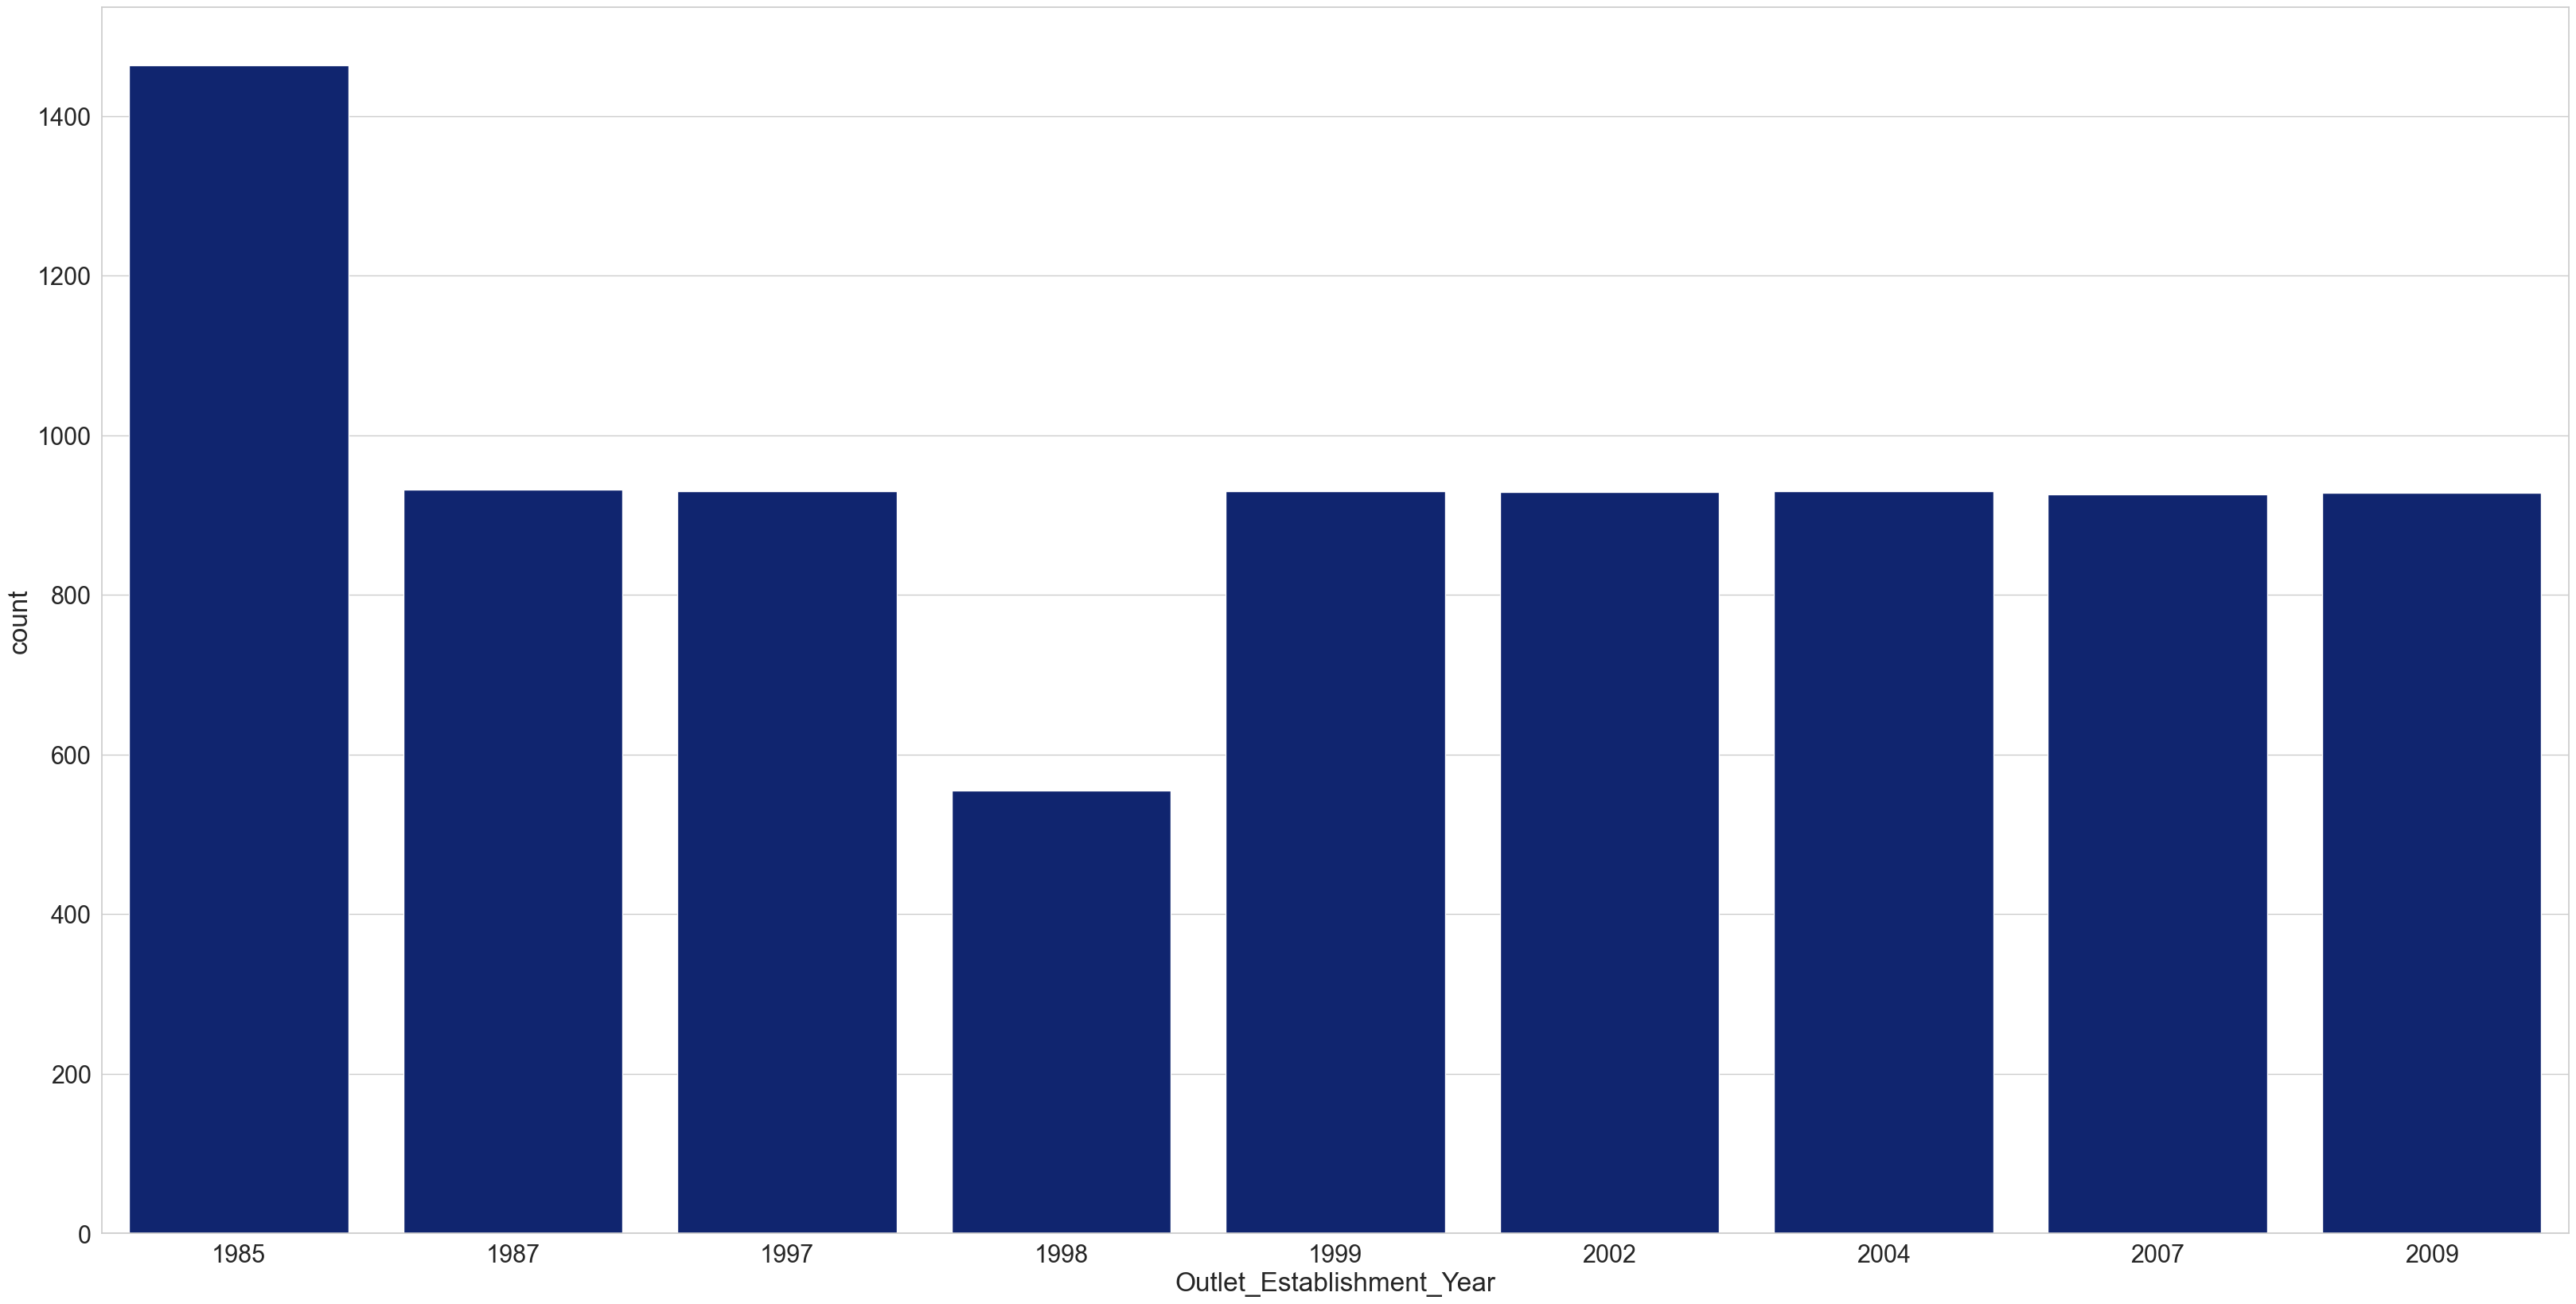

In [129]:
# Countplot for Outlet_Establishment_Year feature
plt.figure(figsize=(40,20))
sns.countplot(x= "Outlet_Establishment_Year" , data=train_data)
plt.show()

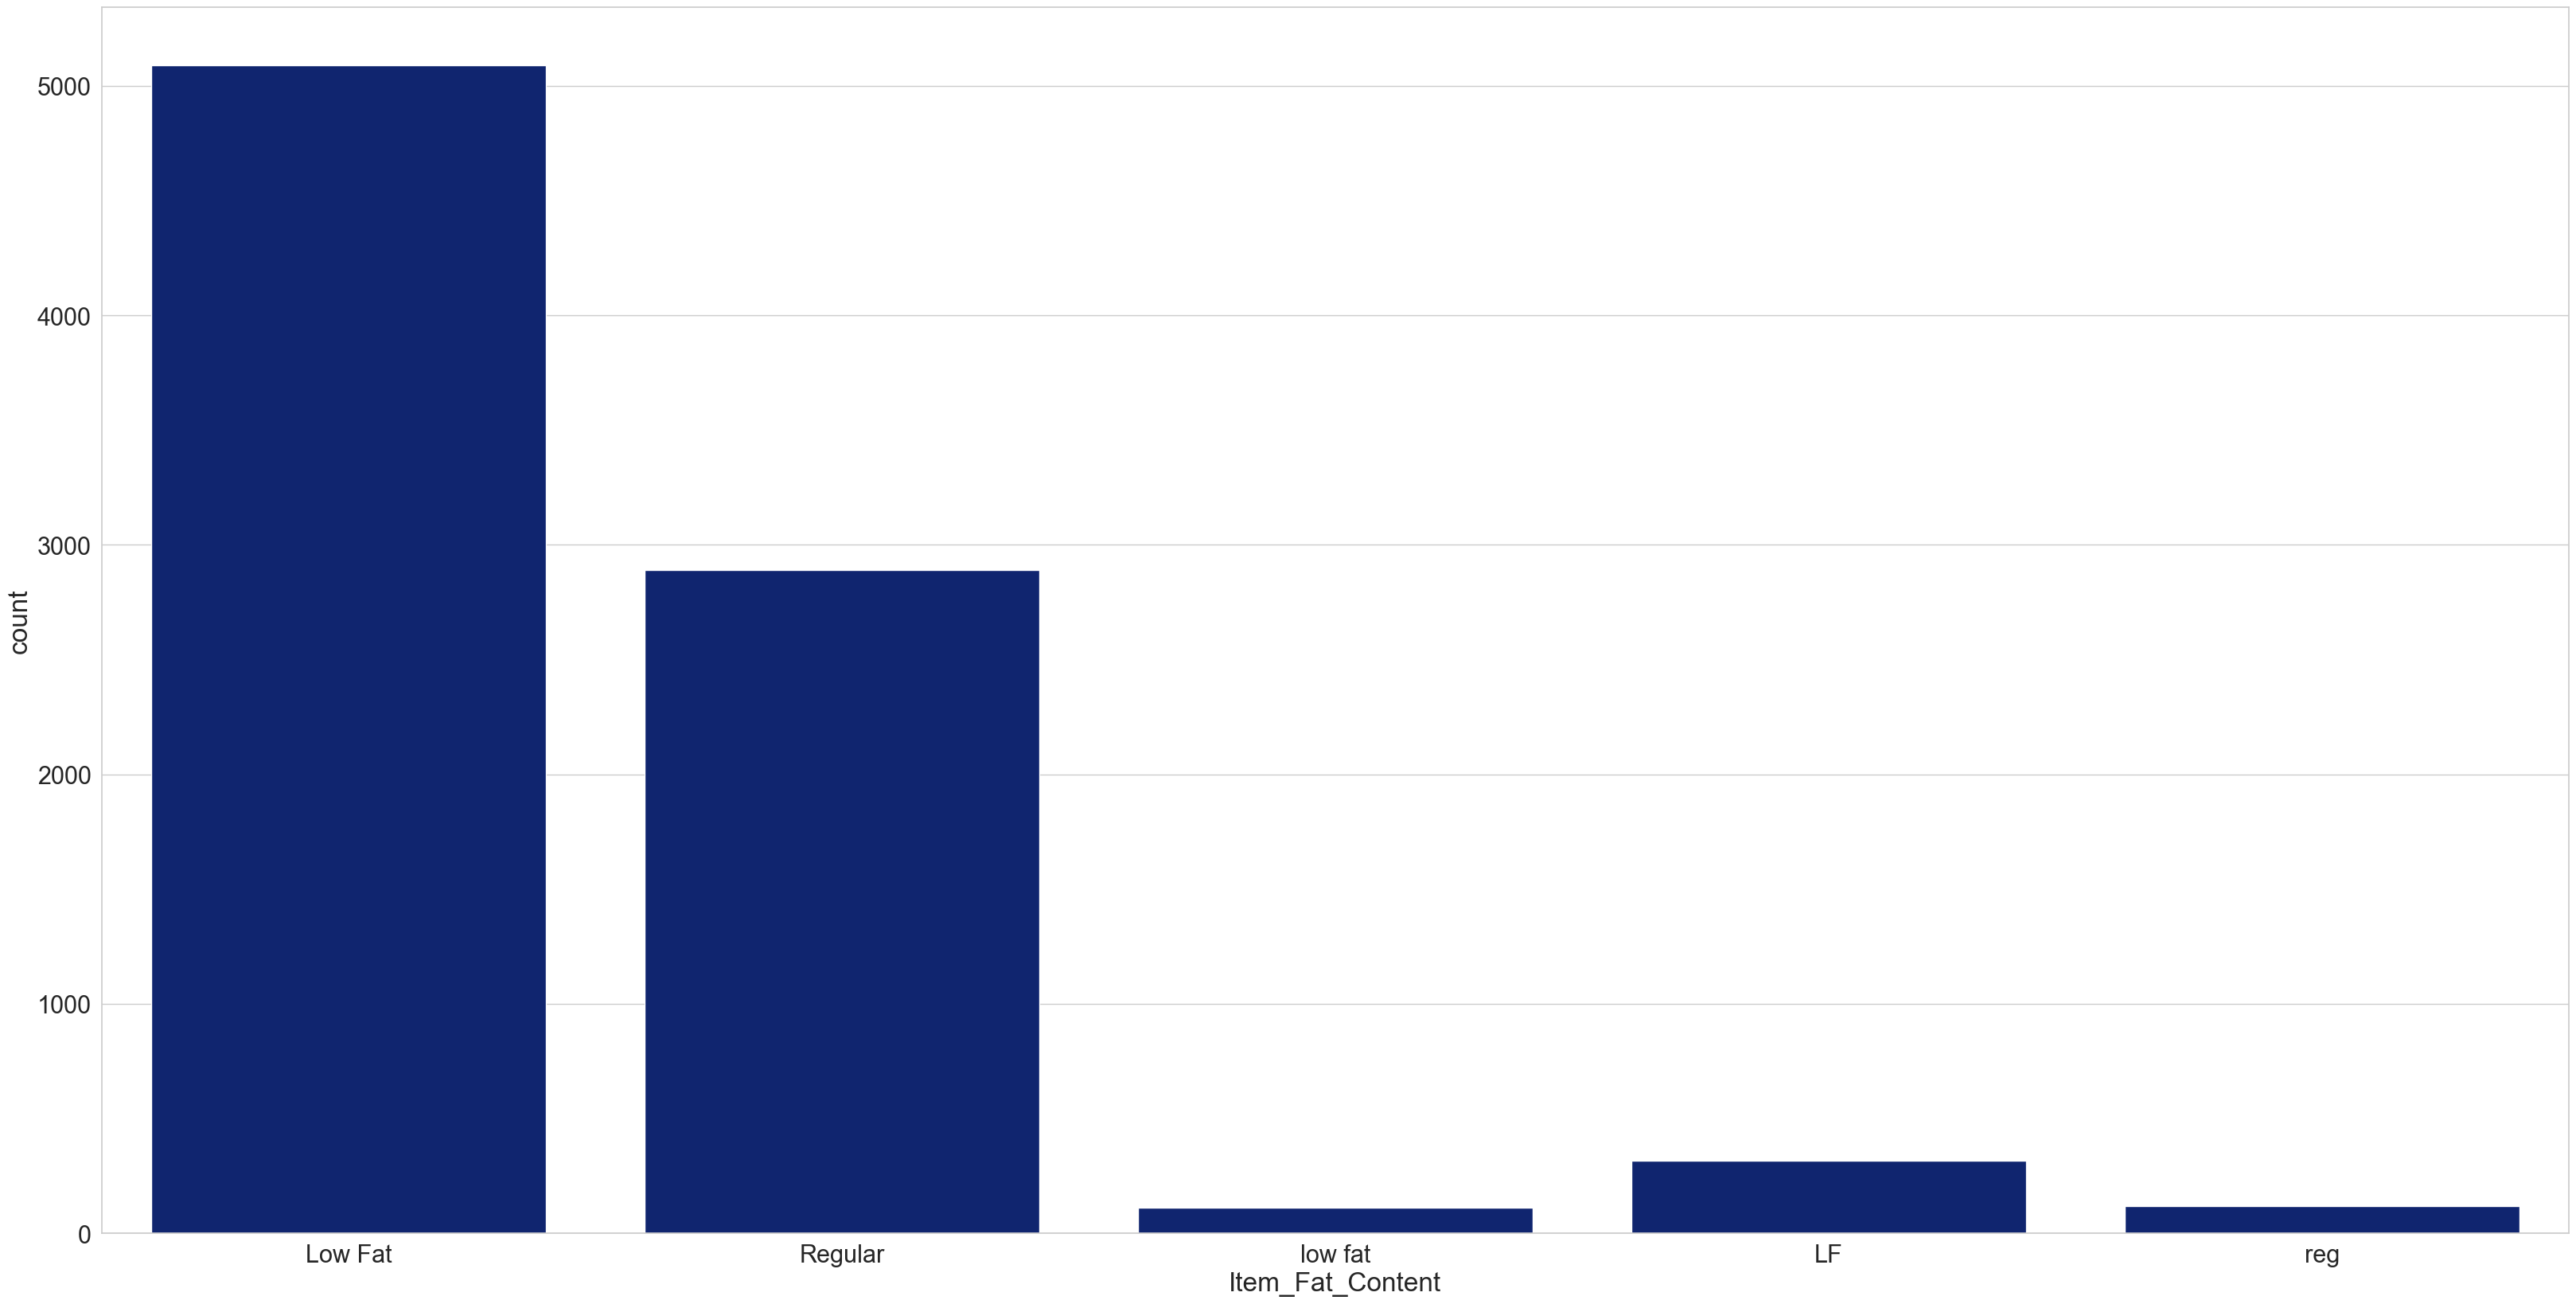

In [130]:
# Countplot for Item_Fat_Content feature
plt.figure(figsize=(40,20))
sns.countplot(x= "Item_Fat_Content" , data=train_data)
plt.show()

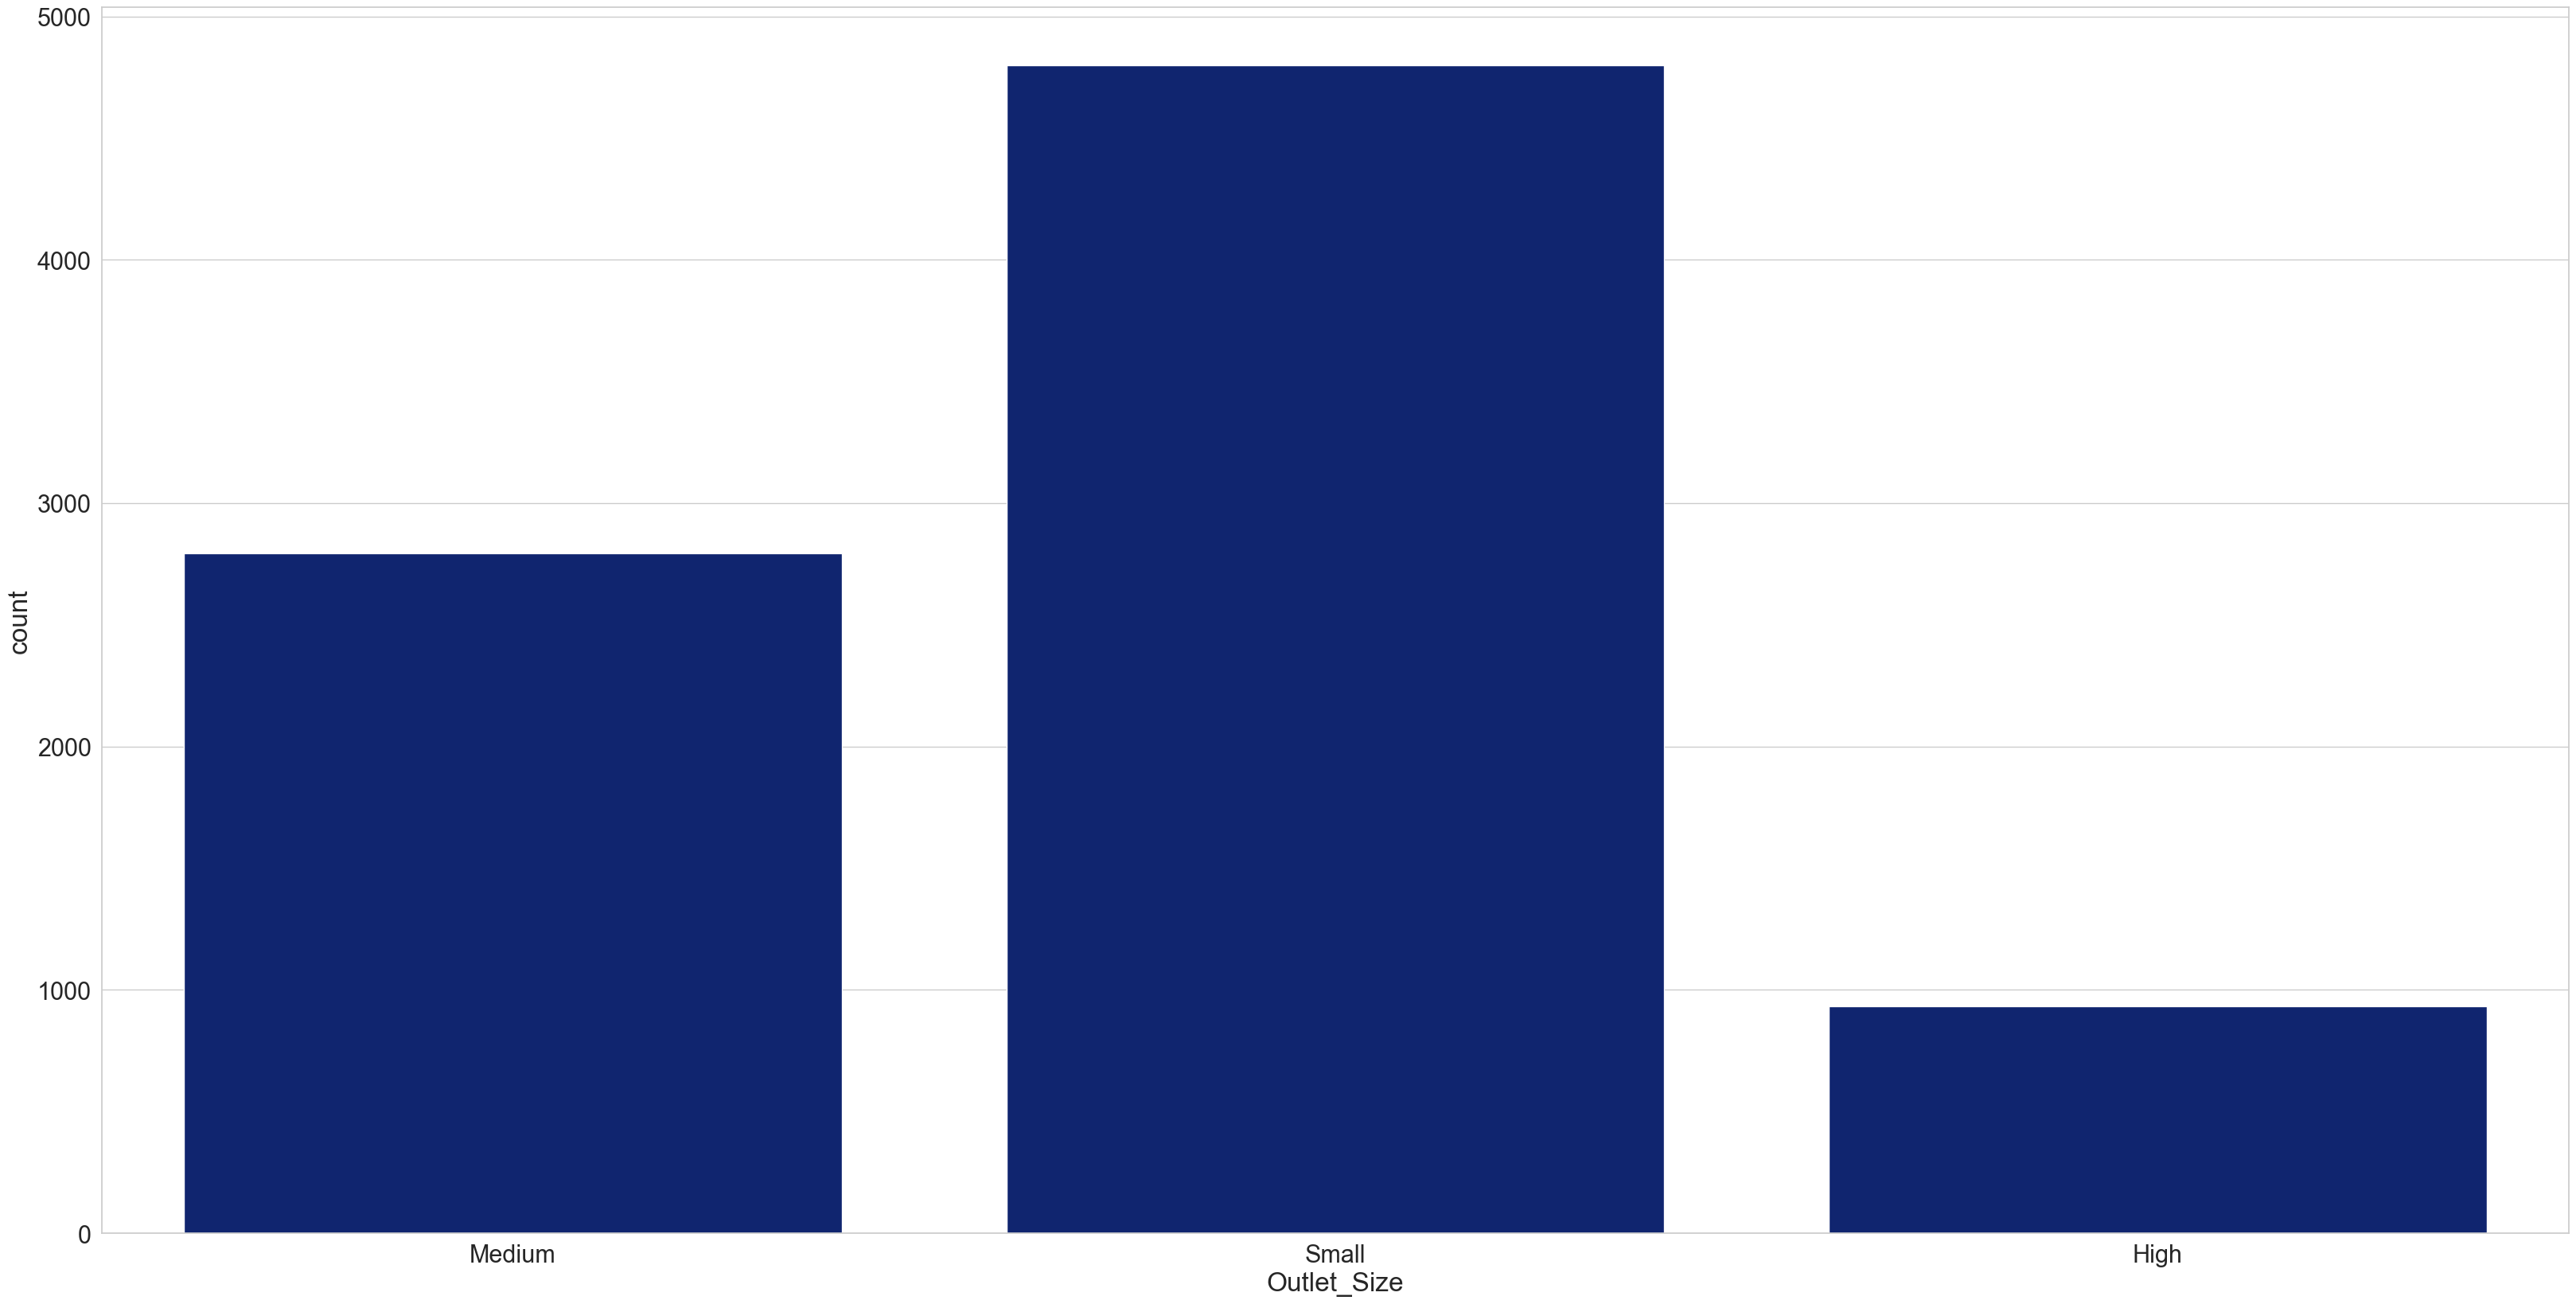

In [131]:
# Countplot for Outlet_Size feature
plt.figure(figsize=(40,20))
sns.countplot(x= "Outlet_Size" , data=train_data)
plt.show()

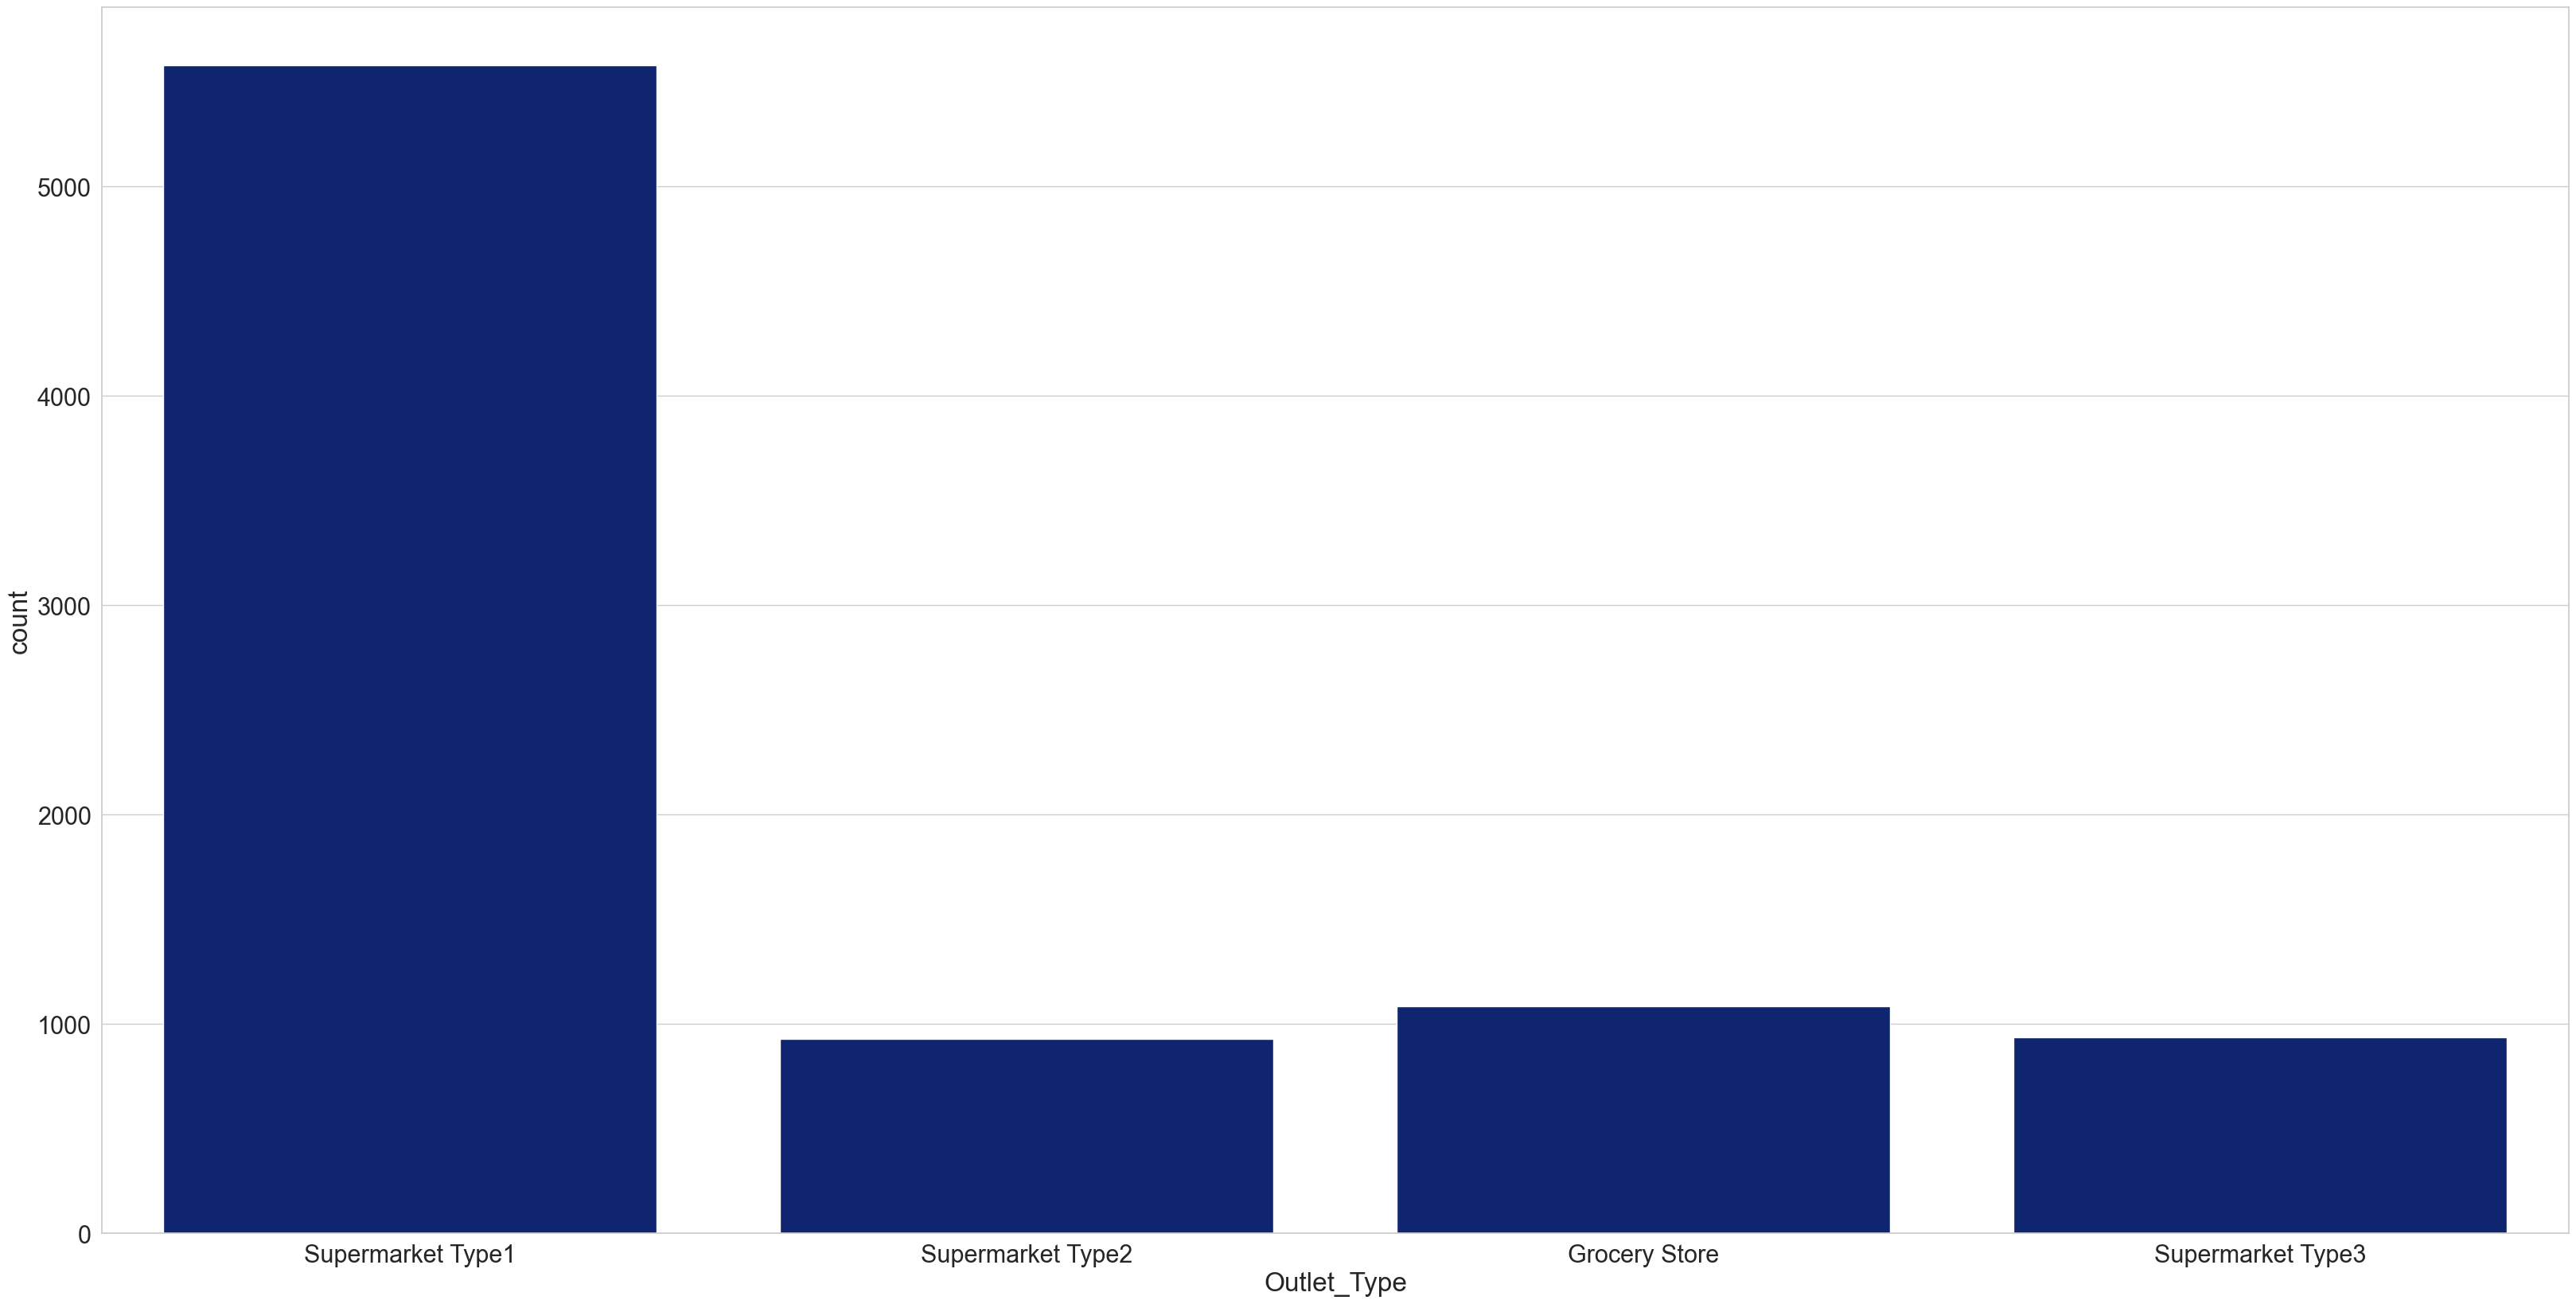

In [132]:
# Countplot for Outlet_Type feature
plt.figure(figsize=(40,20))
sns.countplot(x= "Outlet_Type" , data=train_data)
plt.show()

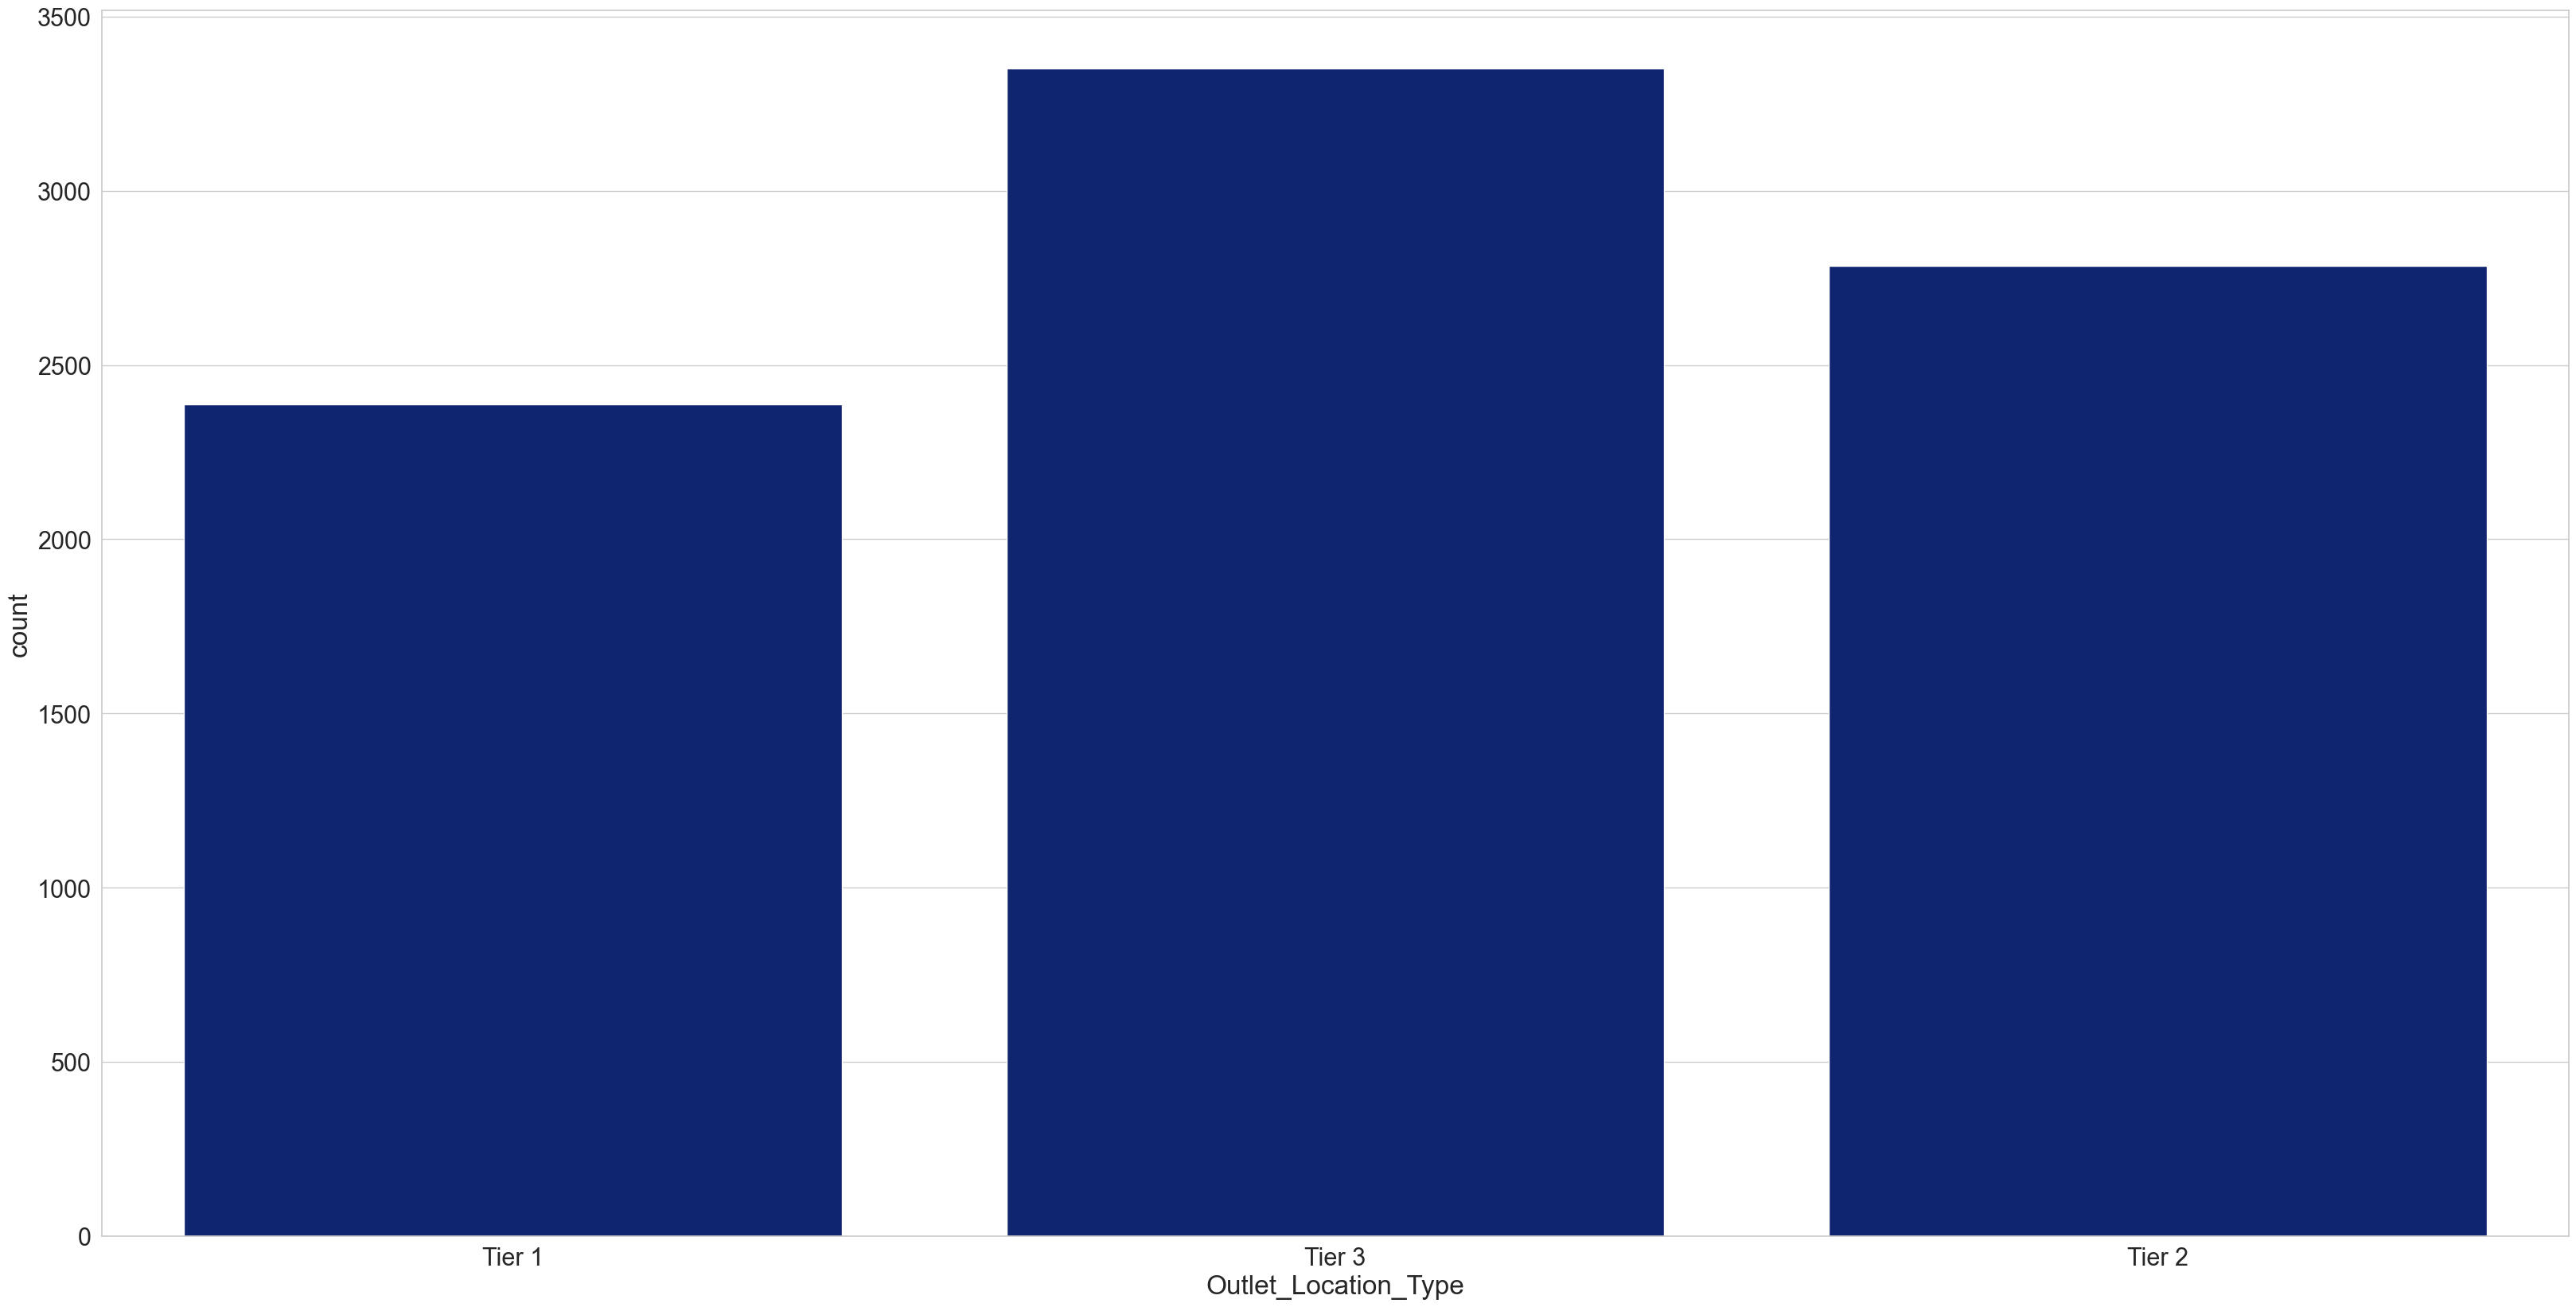

In [133]:
# Countplot for Outlet_Location_Type feature
plt.figure(figsize=(40,20))
sns.countplot(x= "Outlet_Location_Type" , data=train_data)
plt.show()

### Data Preprocessing

In [134]:
# Check the Item_Fat_Content values
train_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [135]:
# merge the similar items
train_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

In [136]:
# Check the fixed Item_Fat_Content values 
train_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

#### Handle Categorical Features

In [137]:
# Encode categorical features using LabelEncoder
encoder = LabelEncoder()
train_data['Item_Fat_Content'] = encoder.fit_transform(train_data['Item_Fat_Content'])

train_data['Item_Type'] = encoder.fit_transform(train_data['Item_Type'])

train_data['Outlet_Size'] = encoder.fit_transform(train_data['Outlet_Size'])

train_data['Outlet_Location_Type'] = encoder.fit_transform(train_data['Outlet_Location_Type'])

train_data['Outlet_Type'] = encoder.fit_transform(train_data['Outlet_Type'])

train_data['Item_Identifier'] = encoder.fit_transform(train_data['Item_Identifier'])

train_data['Outlet_Identifier'] = encoder.fit_transform(train_data['Outlet_Identifier'])

In [141]:
# Check how dataset looks like now
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [140]:
# Check the DataTypes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


#### Scale data using StandardScaler

In [142]:
scaler = StandardScaler()

train_data['Item_Weight'] = scaler.fit_transform(train_data['Item_Weight'].values.reshape(-1,1))
train_data['Item_Visibility'] = scaler.fit_transform(train_data['Item_Visibility'].values.reshape(-1,1))
train_data['Item_MRP'] = scaler.fit_transform(train_data['Item_MRP'].values.reshape(-1,1))
train_data['Item_Outlet_Sales'] = scaler.fit_transform(train_data['Item_Outlet_Sales'].values.reshape(-1,1))


In [143]:
# Check how dataset looks like now
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,-0.841872,0,-0.970732,4,1.747454,9,1999,1,0,1,0.910601
1,8,-1.641706,1,-0.908111,14,-1.489023,3,2009,1,2,2,-1.018440
2,662,1.098554,0,-0.956917,10,0.010040,9,1999,1,0,1,-0.049238
3,1121,1.500838,1,-1.281758,6,0.660050,0,1998,2,2,0,-0.849103
4,1297,-0.929428,0,-1.281758,9,-1.399220,1,1987,0,2,1,-0.695373


#### Split data into features and target

In [144]:
X = train_data.drop('Item_Outlet_Sales' , axis=1)
y = train_data['Item_Outlet_Sales']

In [155]:
# Check features and target shape
print('Featere shape:', X.shape)
print('targe shape:', y.shape)

Featere shape is: (8523, 11)
targe shape is: (8523,)


#### Split Data into train and test data

In [154]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size= 0.2 , random_state=42)

In [158]:
# Check train and test shape
print('Train features shape:', X_train.shape)
print('Train target shape:', y_train.shape)
print('Test features shape:', X_test.shape)
print('Test target shape:', y_test.shape)

Train features shape: (6818, 11)
Train target shape: (6818,)
Test features shape: (1705, 11)
Test target shape: (1705,)


### Model Building

#### RandomForestRegressor Model

In [173]:
# Model selection
RFR_regressor = RandomForestRegressor()

# Fit the training data
RFR_regressor.fit(X_train,y_train)


RandomForestRegressor()

In [174]:
# Predict the testing split
y_pred = RFR_regressor.predict(X_test)

##### Evaluate the model

In [175]:
# Calculate R2
r2score = r2_score(y_test, y_pred)
print('R-Squared:' , r2score)

#calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:',mae)


R-Squared: 0.554223857601071
Mean Absolute Error: 0.4471315563823338


#### GradientBoostingRegressor Model

In [183]:
# Model selection
GBR_regressor = GradientBoostingRegressor()

# Fit the training data
GBR_regressor.fit(X_train,y_train)


GradientBoostingRegressor()

In [184]:
# Predict the testing split
y_pred = GBR_regressor.predict(X_test)

##### Evaluate the model

In [185]:
# Calculate R2
r2score = r2_score(y_test, y_pred)
print('R-Squared:' , r2score)

#calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:',mae)


R-Squared: 0.6037905077632066
Mean Absolute Error: 0.4248832645537468


#### XGBRegressor Model

In [179]:
# Model selection
XGBR_regressor = XGBRegressor()

# Fit the training data
XGBR_regressor.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [180]:
# Predict the testing split
y_pred = XGBR_regressor.predict(X_test)

##### Evaluate the model

In [181]:
# Calculate R2
r2score = r2_score(y_test, y_pred)
print('R-Squared:' , r2score)

#calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:',mae)


R-Squared: 0.5248720781443084
Mean Absolute Error: 0.46362267177674016


### Save the model

In [192]:
# Save the model to disk
model = XGBR_regressor
filename = 'BigMart_Sales.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

### Collect and Process Test Dataset

In [187]:
# Import Test Dataset
test_data = pd.read_csv('Test.csv')


In [188]:
# Check Test Dataset
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


#### Process Test Data

In [193]:
# Test Data information
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [194]:
# Test Data Shape
test_data.shape

(5681, 11)

#### Preprocess Test Data

In [196]:
# Check Item_Fat_Content values
test_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [197]:
# merge the similar items
test_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

In [198]:
# Check the fixed Item_Fat_Content values 
test_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

In [199]:
# Encode categorical features using LabelEncoder
encoder = LabelEncoder()
test_data['Item_Fat_Content'] = encoder.fit_transform(test_data['Item_Fat_Content'])

test_data['Item_Type'] = encoder.fit_transform(test_data['Item_Type'])

test_data['Outlet_Size'] = encoder.fit_transform(test_data['Outlet_Size'])

test_data['Outlet_Location_Type'] = encoder.fit_transform(test_data['Outlet_Location_Type'])

test_data['Outlet_Type'] = encoder.fit_transform(test_data['Outlet_Type'])

test_data['Item_Identifier'] = encoder.fit_transform(test_data['Item_Identifier'])

test_data['Outlet_Identifier'] = encoder.fit_transform(test_data['Outlet_Identifier'])

In [200]:
# Check how test dataset looks like now
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,1,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600,0,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315,0,0.015388,13,155.0340,2,2007,3,1,1
4,1184,NaN,1,0.118599,4,234.2300,5,1985,1,2,3


#### Scale Test Numerical Features

In [202]:
scaler = StandardScaler()

test_data['Item_Weight'] = scaler.fit_transform(test_data['Item_Weight'].values.reshape(-1,1))
test_data['Item_Visibility'] = scaler.fit_transform(test_data['Item_Visibility'].values.reshape(-1,1))
test_data['Item_MRP'] = scaler.fit_transform(test_data['Item_MRP'].values.reshape(-1,1))


In [203]:
# Check how test dataset looks like now
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,1.726792,0,-1.134077,13,-0.536555,9,1999,1,0,1
1,1067,-0.942389,1,-0.531850,4,-0.868937,2,2007,3,1,1
2,1406,0.408281,0,0.661316,11,1.629848,0,1998,3,2,0
3,809,-1.153565,0,-0.981416,13,0.226697,2,2007,3,1,1
4,1184,NaN,1,1.032540,4,1.508110,5,1985,1,2,3


In [207]:
# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
test_pred = loaded_model.predict(test_data)

In [210]:
# Add Item_Outlet_Sales to test dataset
test_data['Item_Outlet_Sales'] = test_pred


In [211]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1103,1.726792,0,-1.134077,13,-0.536555,9,1999,1,0,1,-0.428122
1,1067,-0.942389,1,-0.531850,4,-0.868937,2,2007,3,1,1,-0.536452
2,1406,0.408281,0,0.661316,11,1.629848,0,1998,3,2,0,-1.188807
3,809,-1.153565,0,-0.981416,13,0.226697,2,2007,3,1,1,-0.133614
4,1184,NaN,1,1.032540,4,1.508110,5,1985,1,2,3,2.774334
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231,-0.470726,1,-1.018333,13,0.004727,8,1997,2,0,1,-0.040063
5677,306,-1.092463,1,1.508493,15,0.455014,3,2009,1,2,2,0.265160
5678,1412,-0.577922,0,0.153074,8,-0.360485,7,2002,3,1,1,0.134354
5679,517,0.558355,1,-1.281690,3,1.190844,2,2007,3,1,1,1.493575
